Projects 1 & 2 consisted of addressing whether two hypotheses claiming either a fair or unfair die are distinguishable given some Nroll and Nexp combination, and in particular how robust the rejection of one hypothesis over another changes as Nroll increases. I would like to keep with the dice theme, since I have already established general code that simulates data for this toy experiment.

Currently, I am looking to accomplish the following:
1. Begin with an unfair die with constant a three face-up (N3) probability p3_true
2. Simulate data X assuming some Nexp and Nroll combination, using p3_true
3. For each Nexp, calculate p_hat = N3/Ntot; append to list
4. Generate histogram distribution of p_hat
5. Bin with greatest height represents p_best given the information available, let this value be p_approx
6. The likelihood function for the experiment becomes L(p_approx) = (p_approx)^N3 * (1-p_approx)^(N-N3)
7. p_approx_hat is the maximum of this likelihood function, so the "+/- 1 sigma" (1sig) values are
8. log( L(1sig) / L(p_approx_hat) ) = 1/2    (1sig is when the log-likelihood drops by 1/2 relative to the maximum likelihood value  --> 1sig above, 1sig below p_approx_hat that satisfy the relation)

With this information, I can then investigate how many experiments or trials per experiment yield a value p_hat nearest to the actual N3 probability, along with the lowest uncertainties. 

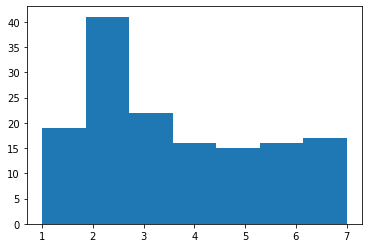

In [6]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
x = np.array([1,2,3,4,5,4,3,2,1,2,3,4,5,4,3,2,1,1,2,2,2,2,2,2,2,3,3,3,4,4,4,5,5,5,5,4,4,4,3,3,3,2,2,2,2,2,2,1,1,1,1,1,1,2,2,2,3,3,3,4,4,4,5,5,5,5,5,7,7,7,7,7,7,7,7,6,6,5,5,4,3,3,3,3,6,6,6,6,6,6,6,6,6,6,6,6,7,7,7,7,7,7,7,7,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,4,5,6,7,6,5,4,3,2,1])
n = plt.hist(x,bins=7)
# n[0] heights, n[1][1] - n[1][0] bin width

In [14]:
np.where(np.max(n[0]))

(array([0]),)

In [25]:
flag = (n[1] < np.max(x))
flag2 = (n[1][flag] == np.max(n[1][flag]))

In [30]:
n[1]

array([1.        , 1.85714286, 2.71428571, 3.57142857, 4.42857143,
       5.28571429, 6.14285714, 7.        ])

In [38]:
hist_max = n[1][np.where(n[0] == np.max(n[0]))][0]

In [33]:
n[1]

array([1.        , 1.85714286, 2.71428571, 3.57142857, 4.42857143,
       5.28571429, 6.14285714, 7.        ])

"Pull" (of a parameter):
    
    . running experimental outcomes multiple times 
    . for each piece of experimental data, can measure parameters from that data 
    . in the ith experiment, we measure some parameter alpha_i (value of parameter that maximizes likelihood given the data for the ith experiment)
    . maximizing likelihood --> can estimate error by determining how quickly the likelihood drops as parameter is moved around
    . log( L(param)/L(best_fit_param) ) <= 1/2, roughly the one-sigma band. 
    . can also look at spread of parameters (estimate uncertainties by simulating MANY experiments) --> Neyman construction; but the above is helpful for only one experiment
    . the PULL --> quantity of (best_fit_param - param_true)/sqrt(variance(param))
    . histogram the pull, if experiment is described by normal distribution of uncertainties, then pull will resemble Gaussian with width 1 centered at 0.
    ..........if bias, central of the pull will shift from zero (bias --> systematic error/bias); too narrow, then estimated uncertainty is too large on average
    . can use pull on SIMULATED experiments to determine whether unbiased --> confidence that error IS the correct error when actually conducting the experiment

    "p3_true" --> EXPERIMENT --> "p3_hat"